In [1]:
import pandas as pd

Reading PM2.5 data

In [2]:
pm_df = pd.read_csv('/Users/nipun/Downloads/PM25-daily-2017.csv')

Finding unique locations for PM data

In [3]:
pm_df.location.unique()

array(['Income Tax Office', 'Siri Fort', 'Punjabi Bagh', 'Anand Vihar',
       'Mandir Marg', 'US Diplomatic Post: New Delhi', 'R K Puram',
       'Delhi Technological University', 'IHBAS', 'Shadipur',
       'NSIT Dwarka', 'IGI Airport Terminal-3, Delhi - IMD',
       'Burari Crossing, Delhi - IMD', 'Lodhi Road, Delhi - IMD',
       'North Campus, Delhi - IMD', 'CRRI Mathura Road, Delhi - IMD',
       'Pusa, Delhi - IMD', 'Aya Nagar, Delhi - IMD', 'Pusa2 IMD',
       'Punjabi Bagh, Delhi - DPCC',
       'Delhi Technological University, Delhi - CPCB',
       'Sirifort, Delhi - CPCB', 'Shadipur, Delhi - CPCB',
       'NSIT Dwarka, Delhi - CPCB', 'IHBAS, Delhi - CPCB',
       'Income Tax Office, Delhi - CPCB', 'Anand Vihar, Delhi - DPCC',
       'R K Puram, Delhi - DPCC', 'Mandir Marg, Delhi - DPCC'], dtype=object)

In [5]:
modis_df = pd.read_csv("modis-2017.csv")

In [6]:
modis_df.Location.unique()

array(['Mandir', 'Pusa', 'Shadipur', 'Punjabi Bagh', 'IGI Airport',
       'NSIT Dwarka', 'Aya Nagar', 'CRRI Mathura', 'R K Puram', 'Sirifort',
       'US Diplomatic Post: New Delhi', 'ITO', 'Lodhi Road'], dtype=object)

In [7]:
mapping = {'Income Tax Office':'ITO',
           'Siri Fort':'Sirifort',
           'Punjabi Bagh':'Punjabi Bagh',
           'Mandir Marg':'Mandir',
           'US Diplomatic Post: New Delhi':'US Diplomatic Post: New Delhi',
           'R K Puram':'R K Puram',
           'Shadipur':'Shadipur',
           'NSIT Dwarka':'NSIT Dwarka',
           'IGI Airport Terminal-3, Delhi - IMD':'IGI Airport',
           'Lodhi Road, Delhi - IMD':'Lodhi Road',
           'CRRI Mathura Road, Delhi - IMD':'CRRI Mathura',
           'Pusa, Delhi - IMD':'Pusa',
           'Aya Nagar, Delhi - IMD':'Aya Nagar',
           'Pusa2 IMD':'Pusa',
           'Punjabi Bagh, Delhi - DPCC':'Punjabi Bagh',
           'Sirifort, Delhi - CPCB':'Sirifort',
           'Shadipur, Delhi - CPCB':'Shadipur',
           'NSIT Dwarka, Delhi - CPCB':'NSIT Dwarka',
           'Income Tax Office, Delhi - CPCB': 'ITO',
           'R K Puram, Delhi - DPCC':'R K Puram',
           'Mandir Marg, Delhi - DPCC':'Mandir'
           }

### Getting PM only for the points we care about

In [8]:
pm_df_subset = pm_df[pm_df.location.isin(mapping.keys())]

In [9]:
mapping_diff = {k:v for k,v in mapping.items() if k!=v}
mapping_diff

{'Aya Nagar, Delhi - IMD': 'Aya Nagar',
 'CRRI Mathura Road, Delhi - IMD': 'CRRI Mathura',
 'IGI Airport Terminal-3, Delhi - IMD': 'IGI Airport',
 'Income Tax Office': 'ITO',
 'Income Tax Office, Delhi - CPCB': 'ITO',
 'Lodhi Road, Delhi - IMD': 'Lodhi Road',
 'Mandir Marg': 'Mandir',
 'Mandir Marg, Delhi - DPCC': 'Mandir',
 'NSIT Dwarka, Delhi - CPCB': 'NSIT Dwarka',
 'Punjabi Bagh, Delhi - DPCC': 'Punjabi Bagh',
 'Pusa, Delhi - IMD': 'Pusa',
 'Pusa2 IMD': 'Pusa',
 'R K Puram, Delhi - DPCC': 'R K Puram',
 'Shadipur, Delhi - CPCB': 'Shadipur',
 'Siri Fort': 'Sirifort',
 'Sirifort, Delhi - CPCB': 'Sirifort'}

In [10]:
pm_df_subset = pm_df_subset.replace({'location':mapping_diff})

In [11]:
pm_df_subset.head()

,local,value,latitude,longitude,location
0,2017-01-01,556.073684,28.6235,77.2494,ITO
1,2017-01-02,264.157895,28.6235,77.2494,ITO
2,2017-01-03,189.456790,28.6235,77.2494,ITO
3,2017-01-04,152.208333,28.6235,77.2494,ITO
4,2017-01-05,201.447917,28.6235,77.2494,ITO


In [12]:
pm_df_subset.index = pd.to_datetime(pm_df_subset.local)

In [13]:
pm_df_subset.head()

,local,value,latitude,longitude,location
local,,,,,
2017-01-01,2017-01-01,556.073684,28.6235,77.2494,ITO
2017-01-02,2017-01-02,264.157895,28.6235,77.2494,ITO
2017-01-03,2017-01-03,189.456790,28.6235,77.2494,ITO
2017-01-04,2017-01-04,152.208333,28.6235,77.2494,ITO
2017-01-05,2017-01-05,201.447917,28.6235,77.2494,ITO


In [14]:
modis_df.index = pd.to_datetime(dict(year=modis_df.Year, month=modis_df.Month, day=modis_df.Day))

In [15]:
modis_df.sort_index(inplace=True)

In [16]:
modis_df = modis_df['2017']
modis_df = modis_df.query('Image_Optical_Depth_Land_And_Ocean>0')

In [17]:
loc_df = {}
for location in modis_df.Location.unique()[:]:
    print(location)
    loc_df[location] = modis_df[modis_df.Location==location].resample("1D").mean().dropna()
    loc_df[location]['Location'] = location

US Diplomatic Post: New Delhi
Sirifort
R K Puram
NSIT Dwarka
IGI Airport
Punjabi Bagh
Shadipur
Pusa
Lodhi Road
CRRI Mathura
Aya Nagar
Mandir
ITO


In [18]:
modis_df = pd.concat(loc_df)
modis_df.index = modis_df.index.droplevel()


In [21]:
t_drop = ["Unnamed: 0","Year","Month","Day","Hour","Minute","Second",
               "Latitude", "Longitude","Deep_Blue_Aerosol_Optical_Depth_550_Land",
               "AOD_550_Dark_Target_Deep_Blue_Combined_QA_Flag",
                "AOD_550_Dark_Target_Deep_Blue_Combined",
               "Optical_Depth_Land_And_Ocean", "Land_sea_Flag", "Land_Ocean_Quality_Flag"]
for col in t_drop:
    if col in modis_df.columns:
        modis_df = modis_df.drop(col, axis=1)
        


In [22]:
modis_df = modis_df.sort_index()
modis_df

,Aerosol_Cloud_Fraction_Land,Image_Optical_Depth_Land_And_Ocean,Location
2017-01-01,0.572000,0.294000,Aya Nagar
2017-01-01,0.000000,0.918000,Punjabi Bagh
2017-01-01,0.490000,0.256000,CRRI Mathura
2017-01-01,0.000000,0.918000,Shadipur
2017-01-01,0.000000,0.918000,US Diplomatic Post: New Delhi
2017-01-01,0.245000,0.587000,NSIT Dwarka
2017-01-01,0.000000,0.918000,Mandir
2017-01-01,0.000000,0.918000,Pusa
2017-01-01,0.245000,0.598000,IGI Airport
2017-01-01,0.245000,0.598000,Sirifort


In [23]:
pm_df_subset = pm_df_subset.drop(["local","latitude","longitude"], axis=1)

In [24]:
pm_df_subset = pm_df_subset.rename(columns = {'location':'Location','value':'PM25'})

In [25]:
pm_df_subset.head()

,PM25,Location
local,,
2017-01-01,556.073684,ITO
2017-01-02,264.157895,ITO
2017-01-03,189.456790,ITO
2017-01-04,152.208333,ITO
2017-01-05,201.447917,ITO


In [26]:
pm_df_subset.head()

,PM25,Location
local,,
2017-01-01,556.073684,ITO
2017-01-02,264.157895,ITO
2017-01-03,189.456790,ITO
2017-01-04,152.208333,ITO
2017-01-05,201.447917,ITO


In [27]:
modis_df.index.name='Index'
pm_df_subset.index.name='Index'

In [28]:
pm_df_subset.describe()

,PM25
count,3128.000000
mean,116.231007
std,137.926843
min,-999.000000
25%,58.362071
50%,100.865625
75%,166.276256
max,1908.541667


In [29]:
pm_df_subset["Date"] = pm_df_subset.index.values
modis_df["Date"] = modis_df.index.values

In [30]:
pm_df_subset.head()

,PM25,Location,Date
Index,,,
2017-01-01,556.073684,ITO,2017-01-01
2017-01-02,264.157895,ITO,2017-01-02
2017-01-03,189.456790,ITO,2017-01-03
2017-01-04,152.208333,ITO,2017-01-04
2017-01-05,201.447917,ITO,2017-01-05


In [31]:
modis_df.head()

,Aerosol_Cloud_Fraction_Land,Image_Optical_Depth_Land_And_Ocean,Location,Date
Index,,,,
2017-01-01,0.572,0.294,Aya Nagar,2017-01-01
2017-01-01,0.000,0.918,Punjabi Bagh,2017-01-01
2017-01-01,0.490,0.256,CRRI Mathura,2017-01-01
2017-01-01,0.000,0.918,Shadipur,2017-01-01
2017-01-01,0.000,0.918,US Diplomatic Post: New Delhi,2017-01-01


In [32]:
merged_df = pd.merge(modis_df, pm_df_subset, on =['Date', 'Location'])

In [33]:
merged_df = merged_df[merged_df.PM25>0.]


In [34]:
merged_df.describe()

,Aerosol_Cloud_Fraction_Land,Image_Optical_Depth_Land_And_Ocean,PM25
count,1295.000000,1295.000000,1295.000000
mean,0.199957,0.602257,101.700783
std,0.208097,0.319568,65.077944
min,0.000000,0.060000,0.840469
25%,0.030250,0.376750,61.769976
50%,0.134000,0.559667,88.098901
75%,0.298000,0.753000,124.363130
max,0.824000,2.921000,1153.250000


In [35]:
%matplotlib inline

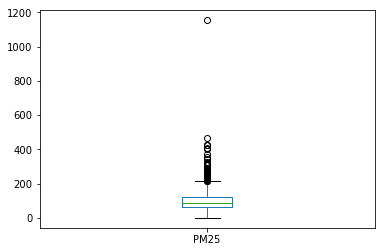

In [36]:
merged_df.PM25.plot(kind='box')

In [37]:
from scipy import stats
import numpy as np
after_od_merged_df = merged_df[(np.abs(stats.zscore(merged_df.PM25)) < 1.2)]

In [38]:
after_od_merged_df.describe()

,Aerosol_Cloud_Fraction_Land,Image_Optical_Depth_Land_And_Ocean,PM25
count,1170.000000,1170.000000,1170.000000
mean,0.203997,0.604595,89.261058
std,0.209250,0.323703,36.290765
min,0.000000,0.060000,23.675000
25%,0.032333,0.372000,60.756052
50%,0.136000,0.561500,84.149347
75%,0.300000,0.756000,114.611743
max,0.824000,2.921000,179.638889


In [39]:
after_od_merged_df.rename(columns={'Image_Optical_Depth_Land_And_Ocean':'AOD',
                                  'Aerosol_Cloud_Fraction_Land':'Cloud_Fraction'}, inplace=True)

/Users/nipun/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [40]:
after_od_merged_df.reindex()

,Cloud_Fraction,AOD,Location,Date,PM25
1,0.000000,0.918000,US Diplomatic Post: New Delhi,2017-01-01,156.612500
2,0.000000,0.918000,Mandir,2017-01-01,168.234043
4,0.000000,0.389000,Punjabi Bagh,2017-01-02,174.054054
7,0.000000,0.389000,Mandir,2017-01-02,174.979167
12,0.000000,0.705000,US Diplomatic Post: New Delhi,2017-01-05,166.120833
15,0.000000,0.705000,Mandir,2017-01-05,155.812500
16,0.108000,0.893000,Mandir,2017-01-06,151.333333
18,0.139667,0.890333,Punjabi Bagh,2017-01-06,139.500000
19,0.021333,0.818000,Sirifort,2017-01-06,159.984783
20,0.085667,1.020667,ITO,2017-01-06,152.968750


In [42]:
after_od_merged_df.to_csv("pm25-modis-10k.csv")

In [139]:
modis_df['2017']

,Image_Optical_Depth_Land_And_Ocean,Location,Date
Index,,,
2017-01-01,0.3350,Aya Nagar,2017-01-01
2017-01-01,0.2500,Shadipur,2017-01-01
2017-01-01,0.2910,Sirifort,2017-01-01
2017-01-01,0.2910,IGI Airport,2017-01-01
2017-01-01,0.2910,CRRI Mathura,2017-01-01
2017-01-01,0.2500,Punjabi Bagh,2017-01-01
2017-01-02,0.4230,Lodhi Road,2017-01-02
2017-01-02,0.4110,NSIT Dwarka,2017-01-02
2017-01-02,0.3790,Sirifort,2017-01-02


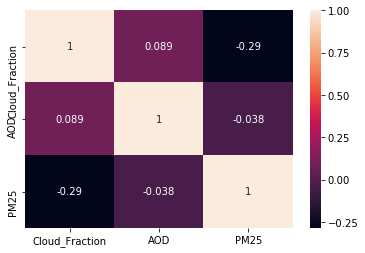

In [48]:
import seaborn as sns
sns.heatmap(after_od_merged_df[['Cloud_Fraction','AOD','PM25']].corr(),annot=True)

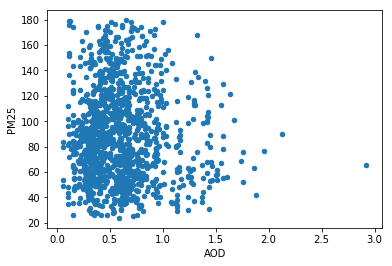

In [51]:
after_od_merged_df.plot(kind='scatter',x='AOD',y='PM25')

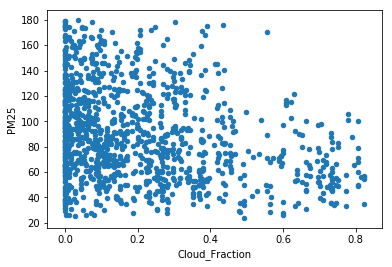

In [53]:
after_od_merged_df.plot(kind='scatter',x='Cloud_Fraction',y='PM25')

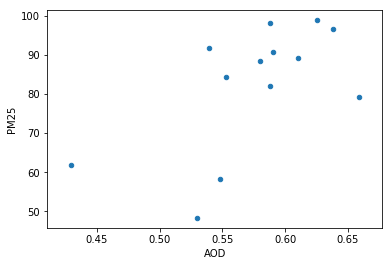

In [58]:
after_od_merged_df.groupby("Location").mean().plot(kind='scatter',x='AOD',y='PM25')

In [64]:
import matplotlib.pyplot as plt

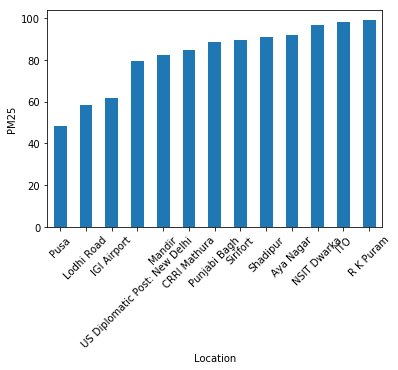

In [66]:
after_od_merged_df.groupby("Location").mean().PM25.sort_values().plot(kind='bar',rot=45)
plt.ylabel("PM25")


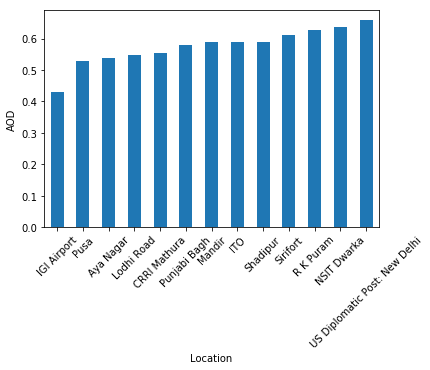

In [67]:
after_od_merged_df.groupby("Location").mean().AOD.sort_values().plot(kind='bar',rot=45)
plt.ylabel("AOD")



In [70]:
after_od_merged_df.Location.unique()

array(['US Diplomatic Post: New Delhi', 'Mandir', 'Punjabi Bagh',
       'Sirifort', 'ITO', 'R K Puram', 'NSIT Dwarka', 'Shadipur',
       'IGI Airport', 'CRRI Mathura', 'Pusa', 'Lodhi Road', 'Aya Nagar'], dtype=object)

In [71]:
after_od_merged_df[after_od_merged_df.Location.isin(['Mandir','R K Puram', 'Pusa'])]

,Cloud_Fraction,AOD,Location,Date,PM25
2,0.000000,0.918000,Mandir,2017-01-01,168.234043
7,0.000000,0.389000,Mandir,2017-01-02,174.979167
15,0.000000,0.705000,Mandir,2017-01-05,155.812500
16,0.108000,0.893000,Mandir,2017-01-06,151.333333
26,0.004500,0.517500,Mandir,2017-01-08,131.812500
32,0.192000,0.600000,Mandir,2017-01-09,104.464286
34,0.217000,0.388000,Mandir,2017-01-10,113.161290
39,0.231000,0.403000,R K Puram,2017-01-10,130.088235
43,0.206500,0.452000,Mandir,2017-01-11,154.409091
72,0.142000,0.221000,Mandir,2017-01-17,124.354167
